

### **Final Project Proposal**

**Submitted by:** Umais Siddiqui, Banu Boopalan, Shri Tripathi  
**Date:** April 5th, 2025  
**Course:** Data Science – DATA620  

**Video Link:** [https://www.youtube.com/watch?v=bhP_rlT92IE](https://www.youtube.com/watch?v=bhP_rlT92IE)  
**GitHub Repository:** [https://github.com/umais/DATA620/blob/master/FinalProject/FinalProjectProposal.ipynb](https://github.com/umais/DATA620/blob/master/FinalProject/FinalProjectProposal.ipynb)  



### **Project Title**  
**Analyzing the Evolution of Stock Market Correlations Using Network Visualization**


### **Project Overview**  
The goal of this project is to analyze how stock market correlations evolve over time using network visualization techniques. We aim to track relationships between major companies or industries and how they strengthen or weaken during economic shifts.  

By using animated network graphs and graph theory techniques (such as Minimum Spanning Trees), we can visualize market dynamics, particularly during financial crises, economic booms, or major global events (e.g., the 2008 crash, COVID-19 pandemic). We will also incorporate sentiment analysis from financial news sources to understand how media emotion (positive or negative) impacts market behavior and investor sentiment during these periods.


### **Motivation**  
Financial markets are deeply interconnected, and correlations between stocks often shift due to macroeconomic conditions, investor psychology, or industry-specific events. Understanding these evolving patterns can provide insights for investors, policymakers, and economists.  

We hypothesize that:  
- During market crashes, stock correlations increase due to synchronized investor behavior (e.g., panic selling).  
- During stable periods, stock correlations diversify, with more independence across sectors.  
- Certain industries (e.g., tech, finance) maintain persistently strong correlations, while others (e.g., consumer goods) fluctuate.  
- News sentiment may trigger or reinforce correlation patterns, as markets react to collective emotions.

In addition, by constructing a **Minimum Spanning Tree (MST)** of stock correlations, we can derive a simplified structure of market relationships to analyze market diversity and inform **systematic trading strategies**.



### **Guiding Question**  
**"How do stock correlations change over time, and what patterns emerge during financial downturns versus stable market periods?"**  
**Sub-question:** *How does financial news sentiment influence market structure and correlation strength?*



### **Data Sources**  
We will utilize multiple sources including:  
- **Yahoo Finance / Alpha Vantage / Kaggle**: Daily stock prices for S&P 500 companies  
- **FRED**: Macroeconomic indicators (interest rates, inflation, GDP)  
- **SEC Filings**: Company sector classifications  
- **Financial News Datasets**: For sentiment analysis (e.g., Reuters, Bloomberg, or Kaggle's financial news datasets)



### **Plan for Analysis**

**1. Data Collection:**  
- Stock price data (10–20 years)  
- News articles and headlines for sentiment scoring  
- Sector metadata for companies  

**2. Data Cleaning & Processing:**  
- Calculate rolling correlation matrices for defined time periods (monthly, quarterly, yearly)  
- Use Natural Language Processing (NLP) to score financial news by sentiment (positive, neutral, negative)  
- Tag news events to corresponding time windows for overlay analysis

**3. Network Construction & Graph Theory Modeling:**  
- **Nodes** = Companies  
- **Edges** = Correlation strength (thresholded, e.g., >0.6)  
- Build and visualize networks for each time period  
- Construct **Minimum Spanning Trees** (MSTs) to observe core market structures  
- Evaluate MST-based metrics (e.g., node centrality, tree diameter) for shifts in market cohesion  
- Compare structures across high-sentiment vs. low-sentiment periods

**4. Visualization:**  
- Use **NetworkX** in Python or **ndtv** in R for animated and interactive network graphs  
- Color-code by industry (e.g., Tech = Blue, Finance = Green)  
- Incorporate financial event markers and sentiment overlays  
- Enable interactivity (e.g., hover to show ticker, sector, correlation score)

**5. Insights & Interpretation:**  
- Identify patterns of correlation and cohesion before/during/after crises  
- Assess sentiment-driven market behavior  
- Derive implications for portfolio diversification and automated trading strategies



### **Concerns & Challenges**  
- **Data Availability:** Clean, long-term historical stock data and reliable financial news archives  
- **Computational Complexity:** Correlation matrices and MST construction over long time series  
- **Threshold Selection:** Deciding meaningful correlation cutoffs and sentiment intensity levels  
- **Sentiment Accuracy:** Ensuring NLP sentiment scoring reflects actual market-moving tone



### **Team & Roles**  
- **Umais Siddiqui** – Lead Data Analyst (data collection, processing, and visualization)  
- **Banu Boopalan** – Research & Interpretation (financial context, macroeconomic events, sentiment analysis)  
- **Shri Tripathi** – Technical Development (network algorithms, MST modeling, interactivity features)



### **Final Deliverable**  
A comprehensive **Jupyter Notebook** with:  
- Dynamic and static network visualizations  
- Sentiment overlays across key financial timelines  
- MST-based analysis of stock structure evolution  
- Actionable insights for market behavior and potential trading strategies



# **Exploratory Data Analysis**

In this section, we present some initial exploratory data analysis to demonstrate our approach and the potential insights we can derive from the stock market data.

## Data Collection and Preparation

We've started by collecting historical stock price data for major companies across different sectors using the yfinance library. Below is a sample of our initial data collection process:

In [3]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options
pd.set_option('display.max_columns', None)
sns.set_theme(style="whitegrid")

# Define list of stocks to analyze
tech_stocks = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META']
finance_stocks = ['JPM', 'BAC', 'GS', 'MS', 'WFC']
energy_stocks = ['XOM', 'CVX', 'COP', 'EOG', 'SLB']

# Combine all stocks
all_stocks = tech_stocks + finance_stocks + energy_stocks

# Download historical data (last 2 years)
start_date = '2021-01-01'
end_date = '2023-01-01'
stock_data = yf.download(all_stocks, start=start_date, end=end_date)

# Display the first few rows of the closing prices
stock_data['Close'].head()

[*********************100%***********************]  15 of 15 completed


Ticker,AAPL,AMZN,BAC,COP,CVX,EOG,GOOGL,GS,JPM,META,MS,MSFT,SLB,WFC,XOM
Date,,,,,,,,,,,,,,,
2021-01-04,126.405235,159.331497,27.059280,33.918480,70.881569,39.877144,85.895844,238.937714,111.620941,267.678436,59.487644,210.002014,20.200853,26.911980,34.851486
2021-01-05,127.968071,160.925507,27.266529,35.864269,72.797760,43.124264,86.588531,244.284409,112.228325,269.698883,60.497536,210.204575,21.286819,27.664064,36.531075
2021-01-06,123.660484,156.919006,28.969561,37.295761,75.140671,44.036022,85.734100,257.466675,117.498100,262.074829,64.145332,204.754135,22.464821,29.621294,37.463245
2021-01-07,127.880150,158.108002,29.609324,38.315784,75.492119,46.883228,88.294868,262.966675,121.356636,267.479340,65.242287,210.580795,22.897367,30.291832,37.757175
2021-01-08,128.983963,159.134995,29.311964,38.315784,76.211723,47.083187,89.463783,261.551086,121.490631,266.314819,65.512169,211.863861,22.860556,30.074368,38.177067


## Initial Correlation Analysis

We've begun analyzing correlations between stocks to identify potential relationships and patterns:

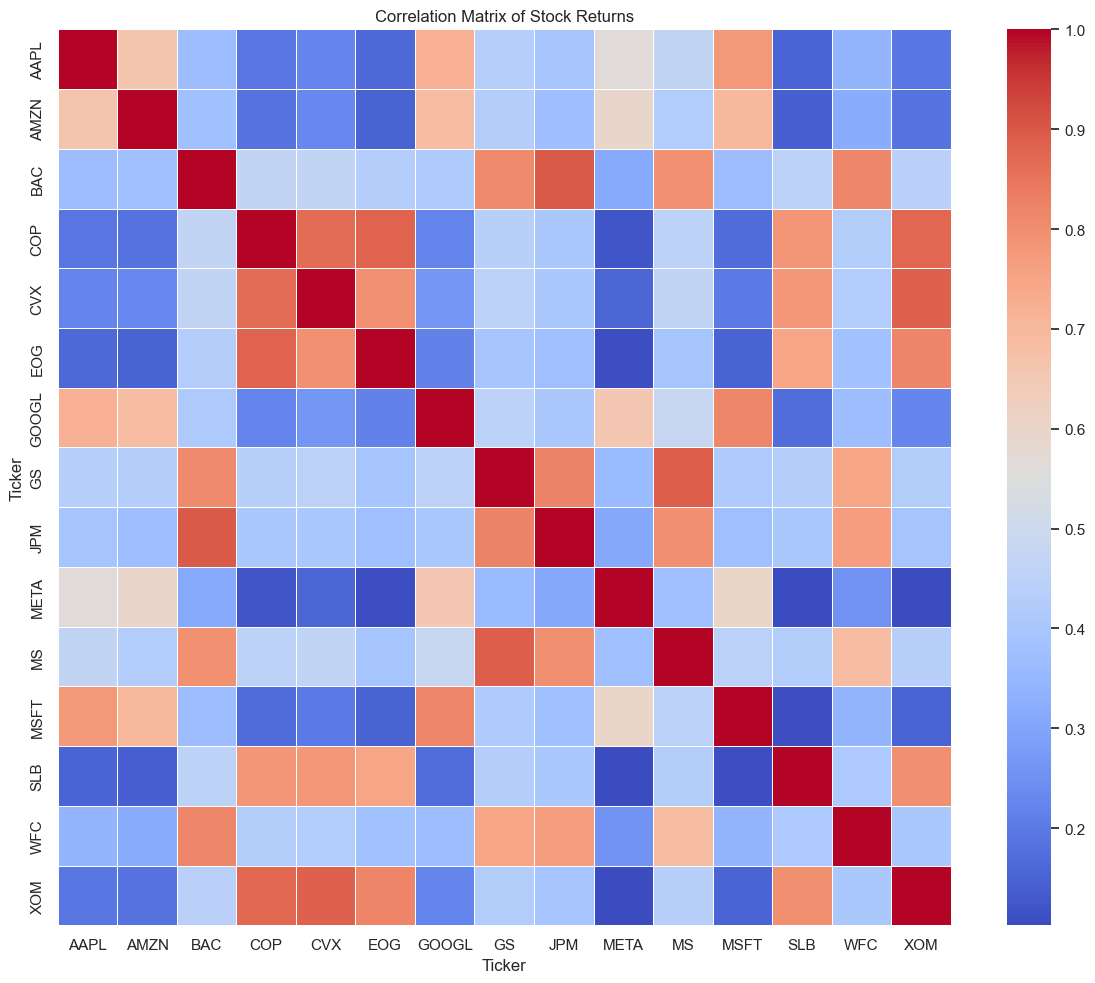

,Stock 1,Stock 2,Correlation
4,BAC,JPM,0.896325
18,GS,MS,0.888636
13,CVX,XOM,0.887072
8,COP,EOG,0.882687
10,COP,XOM,0.874724
7,COP,CVX,0.866164
17,GS,JPM,0.822491
15,EOG,XOM,0.820452
16,GOOGL,MSFT,0.816145
6,BAC,WFC,0.815429


In [4]:
returns = stock_data['Close'].pct_change().dropna()

# Compute correlation matrix
correlation_matrix = returns.corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Stock Returns')
plt.tight_layout()
plt.show()

# Identify highly correlated pairs (correlation > 0.7)
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if correlation_matrix.iloc[i, j] > 0.7:
            high_corr_pairs.append((correlation_matrix.columns[i], 
                                   correlation_matrix.columns[j], 
                                   correlation_matrix.iloc[i, j]))

# Display highly correlated pairs
high_corr_df = pd.DataFrame(high_corr_pairs, columns=['Stock 1', 'Stock 2', 'Correlation'])
high_corr_df.sort_values('Correlation', ascending=False).head(10)

## Sector-based Analysis

We've also started examining how stocks within the same sector correlate with each other compared to cross-sector correlations:


In [5]:
# Calculate average correlation within sectors
tech_corr = correlation_matrix.loc[tech_stocks, tech_stocks].values
finance_corr = correlation_matrix.loc[finance_stocks, finance_stocks].values
energy_corr = correlation_matrix.loc[energy_stocks, energy_stocks].values

# Calculate average correlation (excluding self-correlation which is always 1)
def avg_correlation(corr_matrix):
    total = 0
    count = 0
    for i in range(len(corr_matrix)):
        for j in range(len(corr_matrix)):
            if i != j:
                total += corr_matrix[i][j]
                count += 1
    return total / count

print(f"Average correlation within Tech sector: {avg_correlation(tech_corr):.4f}")
print(f"Average correlation within Finance sector: {avg_correlation(finance_corr):.4f}")
print(f"Average correlation within Energy sector: {avg_correlation(energy_corr):.4f}")

Average correlation within Tech sector: 0.6773
Average correlation within Finance sector: 0.8026
Average correlation within Energy sector: 0.8240


## Next Steps in Our Analysis

Based on our initial findings, we plan to expand our analysis in the following ways:

1. **Time-varying Correlation Analysis**: We will implement a rolling window approach to analyze how correlations change over time, particularly during market stress periods.

2. **Network Analysis**: We will construct correlation networks where stocks are nodes and edges represent correlation strength, allowing us to identify clusters and influential stocks.

3. **Machine Learning Models**: We will develop predictive models to forecast potential correlation changes based on market indicators and economic events.

4. **Risk Assessment**: We will evaluate portfolio diversification strategies based on correlation structures to minimize risk.

5. **Visualization Enhancements**: We will create interactive visualizations to better communicate the complex relationships between stocks and sectors.

Our comprehensive approach will provide valuable insights for investors seeking to understand market dynamics and optimize their investment strategies based on correlation patterns.